## Task 1: Web Scraping and Analysis

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

titles = []
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    for title in parsed_content.find_all("h2", {"class": "text_header"}):
        titles.append(title.get_text())
    
    
    print(reviews)
    print(titles)

Scraping page 1
['✅ Trip Verified |  The customer service is ugly. Tried calling two weeks ago but still had problems with flight. All I get is someone in India. I thought i was flying Iberia once I looked close at ticket it was British Airways. Will never fly British Airway ever again.', "✅ Trip Verified |  Most uncomfortable flight I have ever experienced. It's a long time since I have flown long-haul, the cramped conditions were awful. The rows were so close together when the person in front reclined their seat my TV was so close I couldn't focus on it.  BA seem to want to make economy so uncomfortable to encourage customers to upgrade, this has not worked on me, I will avoid flying BA in future. My onward flight was with LATAM, same 787 aircraft but more room between rows, far more comfortable. On the return flight from Santiago the lights were turned down at 8pm, I feel the cabin crew do this to avoid providing a service, they just disappear behind the curtains.", "✅ Trip Verified

## Saving into a csv file

In [3]:
header = ['titles', 'reviews']
indices = [i for i in range(1, len(titles)+1)]
all_reviews = zip(titles, reviews)
dt = pd.DataFrame(list(all_reviews), columns = header, index = indices)
#dt.to_csv('Reviews of British Airlines.csv')
print(dt)

                                        titles   
1        "never fly British Airway ever again"  \
2                  "Most uncomfortable flight"   
3     "I will never fly British Airways again"   
4              "All in all very disappointing"   
5            "customer service was horrendous"   
...                                        ...   
996           "pay again to pre-reserve seats"   
997              "overall, it’s a good option"   
998               "the flights were excellent"   
999                    "gone notably downhill"   
1000               "Couldn't care less I feel"   

                                                reviews  
1     ✅ Trip Verified |  The customer service is ugl...  
2     ✅ Trip Verified |  Most uncomfortable flight I...  
3     ✅ Trip Verified |  I booked our first out of c...  
4     ✅ Trip Verified | My husband and I booked seat...  
5     Not Verified |  May 3, flew from Seattle to He...  
...                                                

In [4]:
dt['reviews'] = dt['reviews'].str.split('|', expand = True)[1]


In [5]:
dt.head()

titles   
1     "never fly British Airway ever again"  \
2               "Most uncomfortable flight"   
3  "I will never fly British Airways again"   
4           "All in all very disappointing"   
5         "customer service was horrendous"   

                                             reviews  
1    The customer service is ugly. Tried calling ...  
2    Most uncomfortable flight I have ever experi...  
3    I booked our first out of country trip to ta...  
4   My husband and I booked seats within our prem...  
5    May 3, flew from Seattle to Heathrow then to...

## Data Preprocessing Steps:

### Step 1. Lowercasing all the texts and removing quotes from 'titles' column

In [6]:
dt = dt.applymap(lambda x: x.lower())
dt.head()

titles   
1     "never fly british airway ever again"  \
2               "most uncomfortable flight"   
3  "i will never fly british airways again"   
4           "all in all very disappointing"   
5         "customer service was horrendous"   

                                             reviews  
1    the customer service is ugly. tried calling ...  
2    most uncomfortable flight i have ever experi...  
3    i booked our first out of country trip to ta...  
4   my husband and i booked seats within our prem...  
5    may 3, flew from seattle to heathrow then to...

In [7]:
dt['titles'] = dt['titles'].str.strip('"')
dt.head()

titles   
1     never fly british airway ever again  \
2               most uncomfortable flight   
3  i will never fly british airways again   
4           all in all very disappointing   
5         customer service was horrendous   

                                             reviews  
1    the customer service is ugly. tried calling ...  
2    most uncomfortable flight i have ever experi...  
3    i booked our first out of country trip to ta...  
4   my husband and i booked seats within our prem...  
5    may 3, flew from seattle to heathrow then to...

### Step 2: Removing punctuations, special characters, html tags and handling numbers

In [8]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove punctuations and special characters
    text = re.sub('[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    return text


# Apply cleaning function to all columns
for column in dt.columns:
    dt[column] = dt[column].apply(clean_text)

# Display the updated dataset
dt.head()


titles   
1     never fly british airway ever again  \
2               most uncomfortable flight   
3  i will never fly british airways again   
4           all in all very disappointing   
5         customer service was horrendous   

                                             reviews  
1    the customer service is ugly tried calling t...  
2    most uncomfortable flight i have ever experi...  
3    i booked our first out of country trip to ta...  
4   my husband and i booked seats within our prem...  
5    may  flew from seattle to heathrow then to e...

### Step 3: Removing Stopwords, Tokenization, Lemmatizing and POS Tagging

In [9]:
import nltk

# Download the necessary NLTK resources

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')


[nltk_data] Error loading punkt: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     No connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10061] No connection could be made because
[nltk_data]     the target machine actively refused it>


False

In [10]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

dt['POS_tagged_titles'] = dt['titles'].apply(token_stop_pos)
dt['POS_tagged_reviews'] = dt['reviews'].apply(token_stop_pos)
dt.head()

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10061] No connection could be made because
[nltk_data]     the target machine actively refused it>


titles   
1     never fly british airway ever again  \
2               most uncomfortable flight   
3  i will never fly british airways again   
4           all in all very disappointing   
5         customer service was horrendous   

                                             reviews   
1    the customer service is ugly tried calling t...  \
2    most uncomfortable flight i have ever experi...   
3    i booked our first out of country trip to ta...   
4   my husband and i booked seats within our prem...   
5    may  flew from seattle to heathrow then to e...   

                                   POS_tagged_titles   
1  [(never, r), (fly, v), (british, a), (airway, ...  \
2                  [(uncomfortable, a), (flight, n)]   
3  [(never, r), (fly, v), (british, a), (airways,...   
4                               [(disappointing, a)]   
5     [(customer, n), (service, n), (horrendous, a)]   

                                  POS_tagged_reviews  
1  [(customer, n), (service, n), (ugly, r), (trie...  
2  [(uncomfortable, a), (flight, n), (ever, r), (...  
3  [(booked, v), (first, a), (country, n), (trip,...  
4  [(husband, n), (booked, v), (seats, n), (withi...  
5  [(may, None), (flew, v), (seattle, n), (heathr...

In [12]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

dt['Lemma_title'] = dt['POS_tagged_titles'].apply(lemmatize)
dt['Lemma_reviews'] = dt['POS_tagged_reviews'].apply(lemmatize)
dt.head()

titles   
1     never fly british airway ever again  \
2               most uncomfortable flight   
3  i will never fly british airways again   
4           all in all very disappointing   
5         customer service was horrendous   

                                             reviews   
1    the customer service is ugly tried calling t...  \
2    most uncomfortable flight i have ever experi...   
3    i booked our first out of country trip to ta...   
4   my husband and i booked seats within our prem...   
5    may  flew from seattle to heathrow then to e...   

                                   POS_tagged_titles   
1  [(never, r), (fly, v), (british, a), (airway, ...  \
2                  [(uncomfortable, a), (flight, n)]   
3  [(never, r), (fly, v), (british, a), (airways,...   
4                               [(disappointing, a)]   
5     [(customer, n), (service, n), (horrendous, a)]   

                                  POS_tagged_reviews   
1  [(customer, n), (service, n), (ugly, r), (trie...  \
2  [(uncomfortable, a), (flight, n), (ever, r), (...   
3  [(booked, v), (first, a), (country, n), (trip,...   
4  [(husband, n), (booked, v), (seats, n), (withi...   
5  [(may, None), (flew, v), (seattle, n), (heathr...   

                                 titles_tokenized   
1      [never, fly, british, airway, ever, again]  \
2                   [most, uncomfortable, flight]   
3  [i, will, never, fly, british, airways, again]   
4             [all, in, all, very, disappointing]   
5            [customer, service, was, horrendous]   

                                   titles_pos_tagged   
1  [(never, RB), (fly, VBP), (british, JJ), (airw...  \
2   [(most, RBS), (uncomfortable, JJ), (flight, NN)]   
3  [(i, NN), (will, MD), (never, RB), (fly, VB), ...   
4  [(all, DT), (in, IN), (all, DT), (very, RB), (...   
5  [(customer, NN), (service, NN), (was, VBD), (h...   

                                   reviews_tokenized   
1  [the, customer, service, is, ugly, tried, call...  \
2  [most, uncomfortable, flight, i, have, ever, e...   
3  [i, booked, our, first, out, of, country, trip...   
4  [my, husband, and, i, booked, seats, within, o...   
5  [may, flew, from, seattle, to, heathrow, then,...   

                                  reviews_pos_tagged   
1  [(the, DT), (customer, NN), (service, NN), (is...  \
2  [(most, RBS), (uncomfortable, JJ), (flight, NN...   
3  [(i, NN), (booked, VBD), (our, PRP$), (first, ...   
4  [(my, PRP$), (husband, NN), (and, CC), (i, NN)...   
5  [(may, MD), (flew, VB), (from, IN), (seattle, ...   

                       Lemma_title   
1    never fly british airway ever  \
2             uncomfortable flight   
3         never fly british airway   
4                    disappointing   
5      customer service horrendous   

                                       Lemma_reviews  
1    customer service ugly tried call two week ag...  
2    uncomfortable flight ever experience long ti...  
3    book first country trip take husband surpris...  
4    husband book seat within premium economy boo...  
5    may fly seattle heathrow edinburgh ba lose g...

In [14]:
dt[['reviews','Lemma_reviews']]

reviews   
1       the customer service is ugly tried calling t...  \
2       most uncomfortable flight i have ever experi...   
3       i booked our first out of country trip to ta...   
4      my husband and i booked seats within our prem...   
5       may  flew from seattle to heathrow then to e...   
...                                                 ...   
996     flew a now ageing b flight ba  to seattle pl...   
997    flew london gatwick to tirana rinas bag drop ...   
998     london heathrow to murcia and back a few pro...   
999     london to amsterdam bas service has gone not...   
1000    aberdeen to abu dhabi via london despite bei...   

                                          Lemma_reviews  
1       customer service ugly tried call two week ag...  
2       uncomfortable flight ever experience long ti...  
3       book first country trip take husband surpris...  
4       husband book seat within premium economy boo...  
5       may fly seattle heathrow edinburgh ba lose g...  
...                                                 ...  
996     fly age b flight ba seattle pleasant flight ...  
997     flew london gatwick tirana rinas bag drop ga...  
998     london heathrow murcia back problem heathrow...  
999     london amsterdam ba service go notably downh...  
1000    aberdeen abu dhabi via london despite gold m...  

[1000 rows x 2 columns]

## Sentiment Analysis using VADER

#### VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [15]:
!pip install vaderSentiment


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

dt['Sentiment_title'] = dt['Lemma_title'].apply(vadersentimentanalysis)
dt['Sentiment_reviews'] = dt['Lemma_reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
dt['Analysis_title'] = dt['Sentiment_title'].apply(vader_analysis)
dt['Analysis_reviews'] = dt['Sentiment_reviews'].apply(vader_analysis)
dt.head()

titles   
1     never fly british airway ever again  \
2               most uncomfortable flight   
3  i will never fly british airways again   
4           all in all very disappointing   
5         customer service was horrendous   

                                             reviews   
1    the customer service is ugly tried calling t...  \
2    most uncomfortable flight i have ever experi...   
3    i booked our first out of country trip to ta...   
4   my husband and i booked seats within our prem...   
5    may  flew from seattle to heathrow then to e...   

                                   POS_tagged_titles   
1  [(never, r), (fly, v), (british, a), (airway, ...  \
2                  [(uncomfortable, a), (flight, n)]   
3  [(never, r), (fly, v), (british, a), (airways,...   
4                               [(disappointing, a)]   
5     [(customer, n), (service, n), (horrendous, a)]   

                                  POS_tagged_reviews   
1  [(customer, n), (service, n), (ugly, r), (trie...  \
2  [(uncomfortable, a), (flight, n), (ever, r), (...   
3  [(booked, v), (first, a), (country, n), (trip,...   
4  [(husband, n), (booked, v), (seats, n), (withi...   
5  [(may, None), (flew, v), (seattle, n), (heathr...   

                                 titles_tokenized   
1      [never, fly, british, airway, ever, again]  \
2                   [most, uncomfortable, flight]   
3  [i, will, never, fly, british, airways, again]   
4             [all, in, all, very, disappointing]   
5            [customer, service, was, horrendous]   

                                   titles_pos_tagged   
1  [(never, RB), (fly, VBP), (british, JJ), (airw...  \
2   [(most, RBS), (uncomfortable, JJ), (flight, NN)]   
3  [(i, NN), (will, MD), (never, RB), (fly, VB), ...   
4  [(all, DT), (in, IN), (all, DT), (very, RB), (...   
5  [(customer, NN), (service, NN), (was, VBD), (h...   

                                   reviews_tokenized   
1  [the, customer, service, is, ugly, tried, call...  \
2  [most, uncomfortable, flight, i, have, ever, e...   
3  [i, booked, our, first, out, of, country, trip...   
4  [my, husband, and, i, booked, seats, within, o...   
5  [may, flew, from, seattle, to, heathrow, then,...   

                                  reviews_pos_tagged   
1  [(the, DT), (customer, NN), (service, NN), (is...  \
2  [(most, RBS), (uncomfortable, JJ), (flight, NN...   
3  [(i, NN), (booked, VBD), (our, PRP$), (first, ...   
4  [(my, PRP$), (husband, NN), (and, CC), (i, NN)...   
5  [(may, MD), (flew, VB), (from, IN), (seattle, ...   

                       Lemma_title   
1    never fly british airway ever  \
2             uncomfortable flight   
3         never fly british airway   
4                    disappointing   
5      customer service horrendous   

                                       Lemma_reviews  Sentiment_title   
1    customer service ugly tried call two week ag...           0.0000  \
2    uncomfortable flight ever experience long ti...          -0.3818   
3    book first country trip take husband surpris...           0.0000   
4    husband book seat within premium economy boo...          -0.4939   
5    may fly seattle heathrow edinburgh ba lose g...          -0.5859   

   Sentiment_reviews Analysis_title Analysis_reviews  
1            -0.7184        Neutral         Negative  
2            -0.6808       Negative         Negative  
3             0.5499        Neutral         Positive  
4            -0.8442       Negative         Negative  
5            -0.7717       Negative         Negative

In [19]:
vader_title_counts = dt['Analysis_title'].value_counts()
vader_review_counts = dt['Analysis_reviews'].value_counts()
print(vader_title_counts)
print(vader_review_counts)

Analysis_title
Neutral     574
Negative    269
Positive    157
Name: count, dtype: int64
Analysis_reviews
Positive    501
Negative    389
Neutral     110
Name: count, dtype: int64


### Visualization

([<matplotlib.patches.Wedge at 0x1f58d299130>,
 [Text(-0.2534283725512533, 1.0704083613210538, 'Neutral'),
  Text(-0.28358814136462007, -1.062815960586479, 'Negative'),
  Text(1.1890909446132993, -0.6391891155508297, 'Positive')],
 [Text(-0.13823365775522906, 0.5838591061751202, '57.4%'),
  Text(-0.1546844407443382, -0.579717796683534, '26.9%'),
  Text(0.7486868910528179, -0.4024524060875594, '15.7%')])

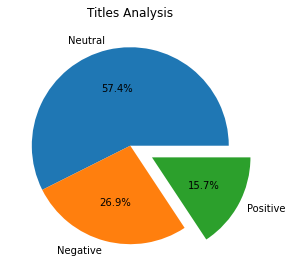

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Titles Analysis")
plt.pie(vader_title_counts.values, labels = vader_title_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x1f58f312c40>,
 [Text(-0.003455701743252077, 1.099994571861817, 'Positive'),
  Text(-0.36935851680486426, -1.0361342992410352, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(-0.0018849282235920417, 0.5999970391973546, '50.1%'),
  Text(-0.2014682818935623, -0.5651641632223827, '38.9%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

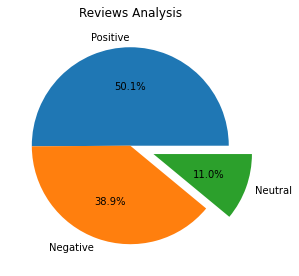

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_review_counts.values, labels = vader_review_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [23]:
dt.to_csv("BA_reviews.csv")